
#Citibike Weekday Ridership Comparison between Young & Old Riders
Group Members: Jianhao Zhou, Yanchao Xu

#1. Idea
We are interested in whether the ages of citibike riders affect their ridership on weekdays. To measure this, we use the ratio defined as the rider biking on weekdays to the rider biking on weekends. We are dividing the whole population into two groups, one is less than and equal to 35. And the other one is greater than 35. Also, we are looking for if there is seasonal difference between winter, spring and summer. Before the test process, we make a guess that the older group would ride more on weekdays than the younger group since the younger group may use the bike more often on weekends. 

#2. Testable Hypothesis
Hypothesis 1: comparing the mean value of ratios for two samples in winter:
  - NULL HYPOTHESIS: The ratio of people older than 35 biking on weekdays to the their biking on weekends is less than or equal to the ratio of people not older than 35 biking on weekdays to their biking on weekends in winter.
  - ALTERNATIVE HYPOTHESIS: The ratio of people older than 35 biking on weekdays to the their biking on weekends is higher than the ratio of people not older than 35 biking on weekdays to their biking on weekends in winter.

Hypothesis 2: comparing the mean value of ratios for two samples in spring:
  - NULL HYPOTHESIS: The ratio of people older than 35 biking on weekdays to the their biking on weekends is less than or equal to the ratio of people not older than 35 biking on weekdays to their biking on weekends in spring.
  - ALTERNATIVE HYPERTHESIS: The ratio of people older than 35 biking on weekdays to the their biking on weekends is higher than the ratio of people not older than 35 biking on weekdays to their biking on weekends in spring.
 
Hypothesis 3: comparing the mean value of ratios for two samples in summer:
  - NULL HYPOTHESIS: The ratio of people older than 35 biking on weekdays to the their biking on weekends is less than or equal to the ratio of people not older than 35 biking on weekdays to their biking on weekends in summer.
  - ALTERNATIVE HYPOTHESIS: The ratio of people older than 35 biking on weekdays to the their biking on weekends is higher than the ratio of people not older than 35 biking on weekdays to their biking on weekends in summer.

#3. Confidence Level
alpha = .05

#4. Hypothesis Test
We used the Z-test for both hypotheses in winter, spring, and summer.

In [1]:
# Import statements
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)
import scipy.stats
import glob
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


/Users/JianhaoZhou/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Under the directory 'os.getenv ('PUI2015')+'/notebooks/data/', we put '201412-citibike-tripdata.csv', 
#'201501-citibike-tripdata.csv', '201502-citibike-tripdata.csv' in a new directory 'winter', '201503-citibike-tripdata.csv', 
#'201504-citibike-tripdata.csv', '201505-citibike-tripdata.csv' in a new directory 'spring' and '201506-citibike-tripdata.csv', 
#'201507-citibike-tripdata.csv', '201508-citibike-tripdata.csv' in a new directory 'summer'.

# Concatenate all winter data into one DataFrame 'dfs_W'
filenames_winter = glob.glob(os.getenv ('PUI2015') + "/notebooks/data/winter/*.csv")
dfs_W1 = []
for filename in filenames_winter:
    dfs_W1.append(pd.read_csv(filename))
dfs_W = pd.concat(dfs_W1, ignore_index=True)

# Concatenate all spring data into one DataFrame 'dfs_Sp'
filenames_spring = glob.glob(os.getenv ('PUI2015') + "/notebooks/data/spring/*.csv")
dfs_Sp1 = []
for filename in filenames_spring:
    dfs_Sp1.append(pd.read_csv(filename))
dfs_Sp = pd.concat(dfs_Sp1, ignore_index=True)

# Concatenate all summer data into one DataFrame 'dfs_Su'
filenames_summer = glob.glob(os.getenv ('PUI2015') + "/notebooks/data/summer/*.csv")
dfs_Su1 = []
for filename in filenames_summer:
    dfs_Su1.append(pd.read_csv(filename))
dfs_Su = pd.concat(dfs_Su1, ignore_index=True)


print dfs_W.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


#Winter

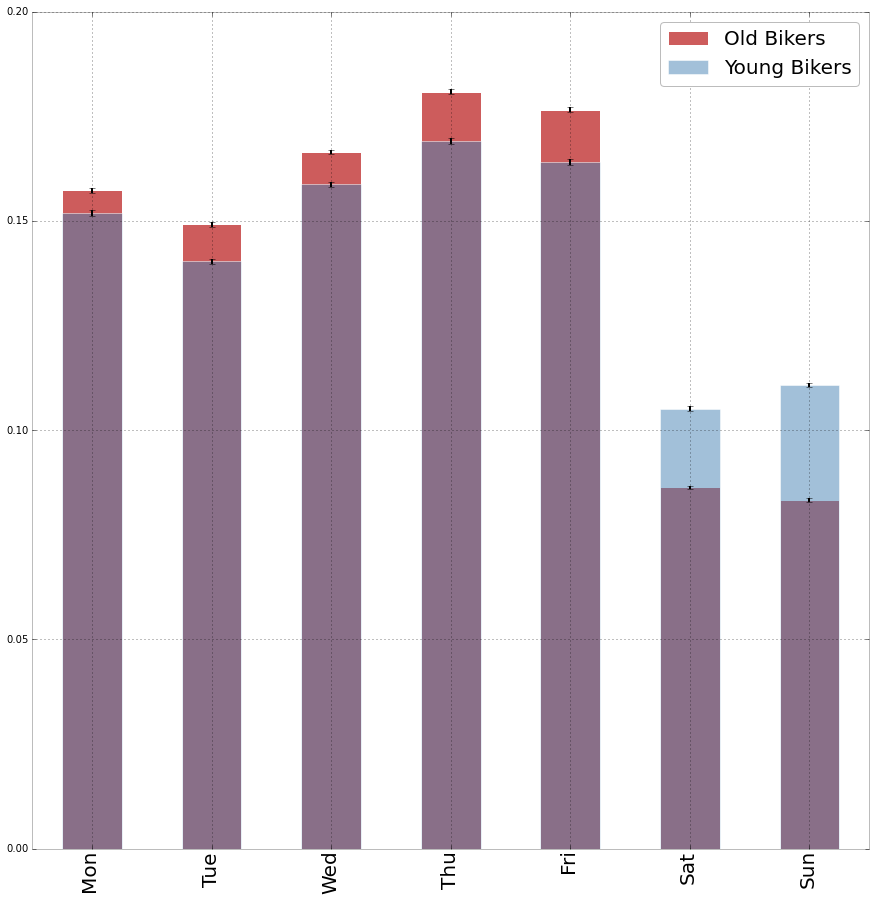

In [3]:
#we have to first divide the data into two age groups
dfs_W['date'] = pd.to_datetime(dfs_W['starttime'])
fig=pl.figure(figsize(15,15))
dfs_W['age'] = 2015-dfs_W['birth year']

counts_o1= dfs_W.date[dfs_W.age>35].groupby([dfs_W.date.dt.weekday]).count()
norm_o1= counts_o1.sum()
error_o1=np.sqrt(counts_o1)
((counts_o1)/norm_o1).plot(kind="bar",color='IndianRed',  yerr=[((error_o1)/norm_o1,(error_o1)/norm_o1)], label='Old Bikers')

counts_y1=dfs_W.date[dfs_W.age<=35].groupby([dfs_W.date.dt.weekday]).count()
norm_y1=counts_y1.sum()
error_y1=np.sqrt(counts_y1)
ax1=((counts_y1)/norm_y1).plot(kind="bar", alpha=0.5, yerr=[((error_y1)/norm_y1,(error_y1)/norm_y1)], label='Young Bikers')
ax1.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
#here we are using nomalized data to plot the two groups
pl.legend(['Old Bikers','Young Bikers'],fontsize=20)


0.830363327246 0.169636672754 0.0012987163571 0.000587002705647
0.784091500867 0.215908499133 0.00146597577275 0.000769269101873
0.830363327246 0.784091500867 0.810667786644 0.000855831588431 54.0665091174


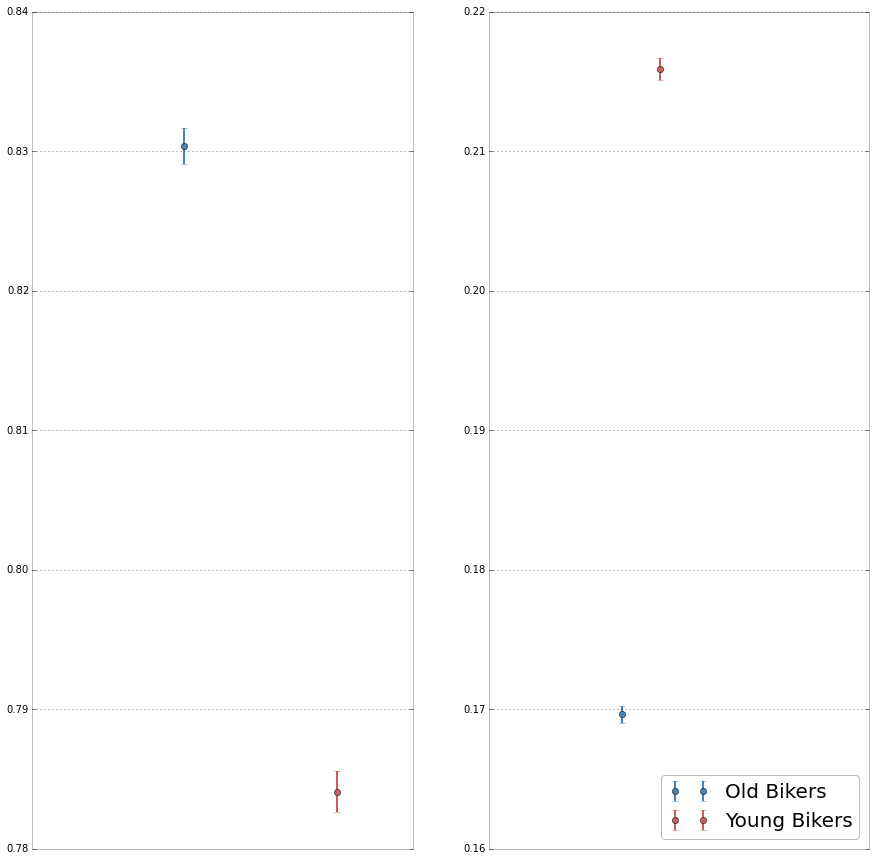

In [4]:
#it is time to calculate the z-score for the test
fig=pl.figure(figsize(15,15))
ax1_1=fig.add_subplot(121)
ax1_2=fig.add_subplot(122)
ax1_1.set_xticks([])
ax1_2.set_xticks([])
week_o1 = sum(counts_o1[:-2])*1.0/norm_o1
weekend_o1 = sum(counts_o1[-2:])*1.0/norm_o1
eweek_o1 = np.sqrt(sum(error_o1[:-2]**2))/norm_o1
eweekend_o1 = np.sqrt(sum(error_o1[-2:]**2))/norm_o1

week_y1 = sum(counts_y1[:-2])*1.0/norm_y1
weekend_y1 = sum(counts_y1[-2:])*1.0/norm_y1
eweek_y1 = np.sqrt(sum(error_y1[:-2]**2))/norm_y1
eweekend_y1 = np.sqrt(sum(error_y1[-2:]**2))/norm_y1

print week_o1,weekend_o1,eweek_o1,eweekend_o1
print week_y1,weekend_y1,eweek_y1,eweekend_y1

ax1_1.errorbar([0.2],[week_o1], yerr=[eweek_o1], fmt='o', label='Old Bikers')
ax1_1.errorbar([0.4],[week_y1], yerr=[eweek_y1], fmt='o', label='Young Bikers')
ax1_1.set_xlim(0,0.5)
ax1_2.errorbar([0.2],[weekend_o1], yerr=[eweekend_o1], fmt='o', label='Old Bikers')
ax1_2.errorbar([0.4],[weekend_y1], yerr=[eweekend_y1], fmt='o', label='Young Bikers')
ax1_2.set_xlim(0,0.5)
pl.xlim(-0.5,1.5)
pl.legend(fontsize=20, loc=4)

p1 = (week_o1*norm_o1 + week_y1*norm_y1)*1.0/ (norm_o1 + norm_y1)
SE1 = np.sqrt(p1 * ( 1. - p1 ) * ( (1./norm_o1) + (1./norm_y1) ) )
z1 = (week_o1 - week_y1 ) / SE1
print week_o1, week_y1, p1,SE1,z1
#we have a z-score here 

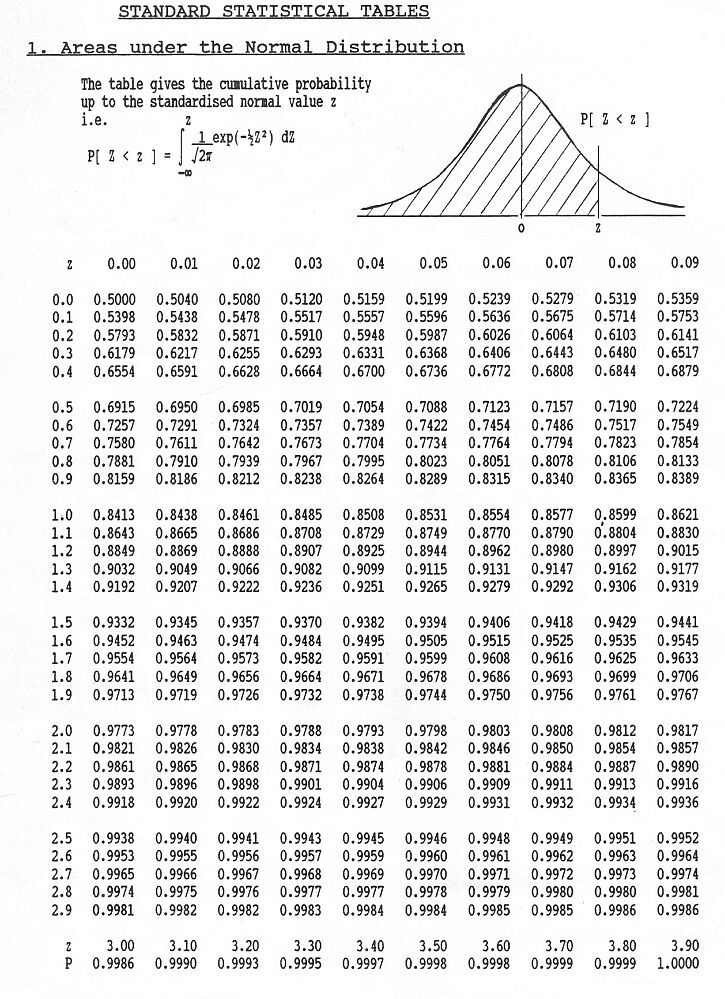

In [5]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

In [6]:
# we get p-value according to z-score and the table, then we determine whether to reject the null hypothesis or not
alpha=0.05
p_week1=1-1

def report_result(p,a):
    print 'is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

report_result(p_week1,alpha)

is the p value 0.00 smaller than the critical value 0.05? 
YES!
the Null hypothesis is rejected


#Spring

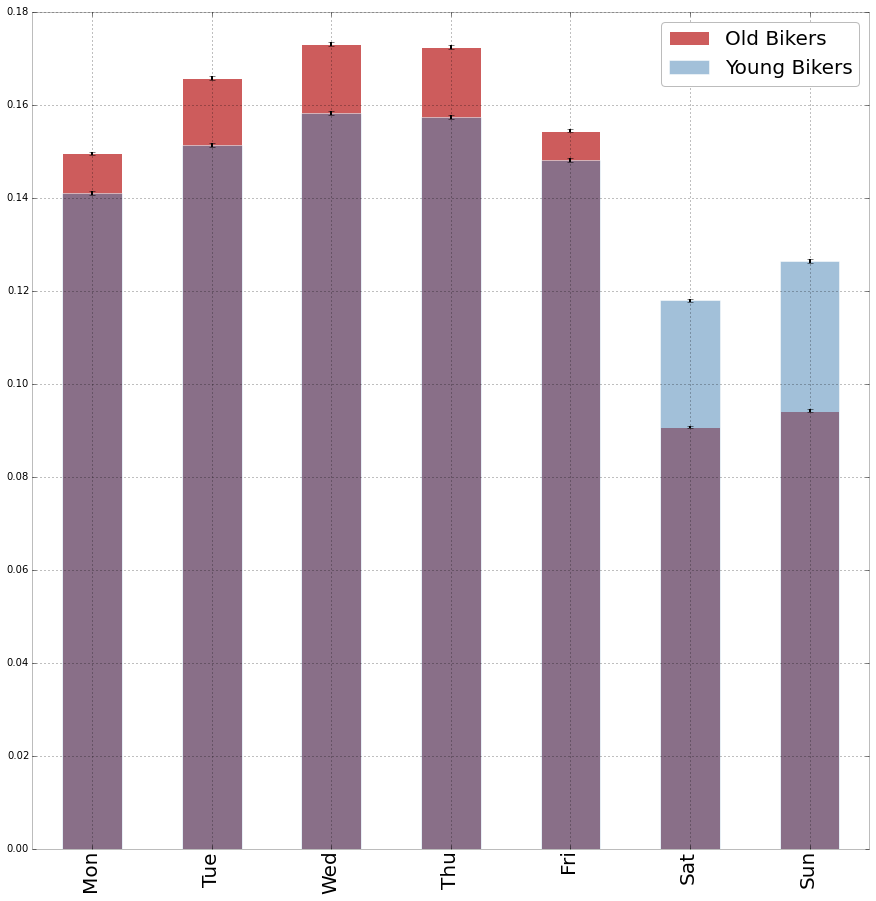

In [7]:
dfs_Sp['date'] = pd.to_datetime(dfs_Sp['starttime'])
fig=pl.figure(figsize(15,15))
dfs_Sp['age'] = 2015-dfs_Sp['birth year']

counts_o2= dfs_Sp.date[dfs_Sp.age>35].groupby([dfs_Sp.date.dt.weekday]).count()
norm_o2= counts_o2.sum()
error_o2=np.sqrt(counts_o2)
((counts_o2)/norm_o2).plot(kind="bar", color='IndianRed',  yerr=[((error_o2)/norm_o2,(error_o2)/norm_o2)], label='Old Bikers')

counts_y2=dfs_Sp.date[dfs_Sp.age<=35].groupby([dfs_Sp.date.dt.weekday]).count()
norm_y2=counts_y2.sum()
error_y2=np.sqrt(counts_y2)
ax2=((counts_y2)/norm_y2).plot(kind="bar", alpha=0.5, yerr=[((error_y2)/norm_y2,(error_y2)/norm_y2)], label='Young Bikers')
ax2.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)

pl.legend(['Old Bikers','Young Bikers'],fontsize=20)


0.815184867455 0.184815132545 0.000942652804119 0.000448840950355
0.755723668348 0.244276331652 0.000976710848934 0.000555296830282
0.815184867455 0.755723668348 0.787631465038 0.000627277250721 94.7925323902


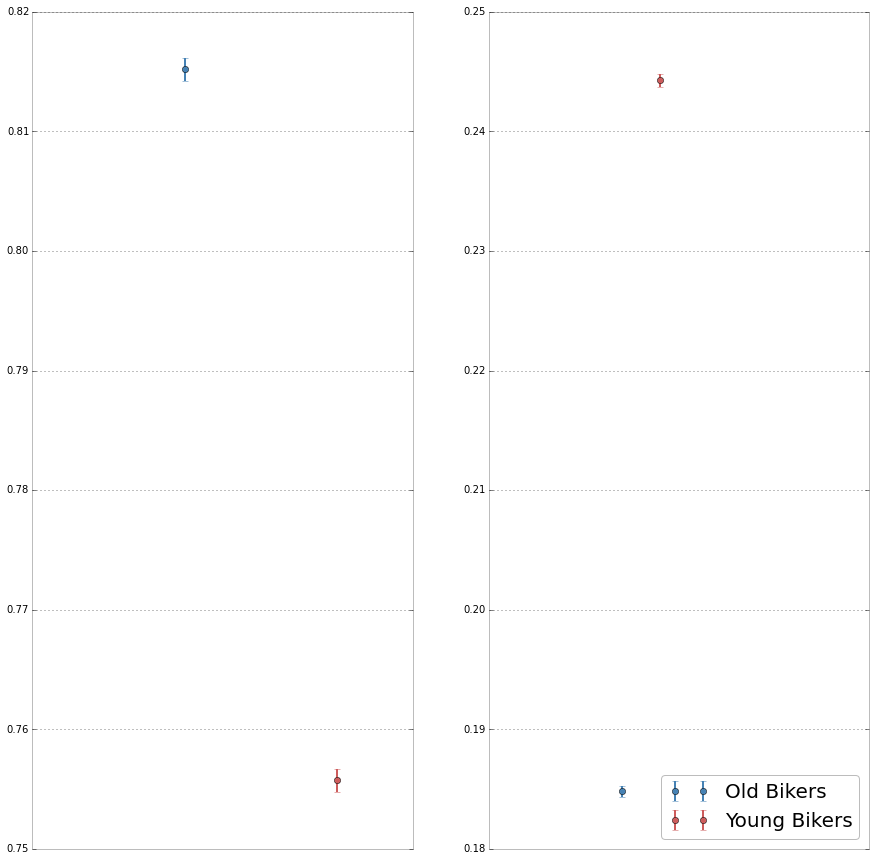

In [8]:
fig=pl.figure(figsize(15,15))
ax2_1=fig.add_subplot(121)
ax2_2=fig.add_subplot(122)
ax2_1.set_xticks([])
ax2_2.set_xticks([])
week_o2 = sum(counts_o2[:-2])*1.0/norm_o2
weekend_o2 = sum(counts_o2[-2:])*1.0/norm_o2
eweek_o2 = np.sqrt(sum(error_o2[:-2]**2))/norm_o2
eweekend_o2 = np.sqrt(sum(error_o2[-2:]**2))/norm_o2

week_y2 = sum(counts_y2[:-2])*1.0/norm_y2
weekend_y2 = sum(counts_y2[-2:])*1.0/norm_y2
eweek_y2 = np.sqrt(sum(error_y2[:-2]**2))/norm_y2
eweekend_y2 = np.sqrt(sum(error_y2[-2:]**2))/norm_y2

print week_o2,weekend_o2,eweek_o2,eweekend_o2
print week_y2,weekend_y2,eweek_y2,eweekend_y2

ax2_1.errorbar([0.2],[week_o2], yerr=[eweek_o2], fmt='o', label='Old Bikers')
ax2_1.errorbar([0.4],[week_y2], yerr=[eweek_y2], fmt='o', label='Young Bikers')
ax2_1.set_xlim(0,0.5)
ax2_2.errorbar([0.2],[weekend_o2], yerr=[eweekend_o2], fmt='o', label='Old Bikers')
ax2_2.errorbar([0.4],[weekend_y2], yerr=[eweekend_y2], fmt='o', label='Young Bikers')
ax2_2.set_xlim(0,0.5)
pl.xlim(-0.5,1.5)
pl.legend(fontsize=20, loc=4)

p2 = (week_o2*norm_o2 + week_y2*norm_y2)*1.0/ (norm_o2 + norm_y2)
SE2 = np.sqrt(p2 * ( 1. - p2 ) * ( (1./norm_o2) + (1./norm_y2) ) )
z2 = (week_o2 - week_y2 ) / SE2
print week_o2, week_y2, p2,SE2,z2

In [9]:
alpha=0.05
p_week2=1-1

def report_result(p,a):
    print 'is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

report_result(p_week1,alpha)

is the p value 0.00 smaller than the critical value 0.05? 
YES!
the Null hypothesis is rejected


#Summer

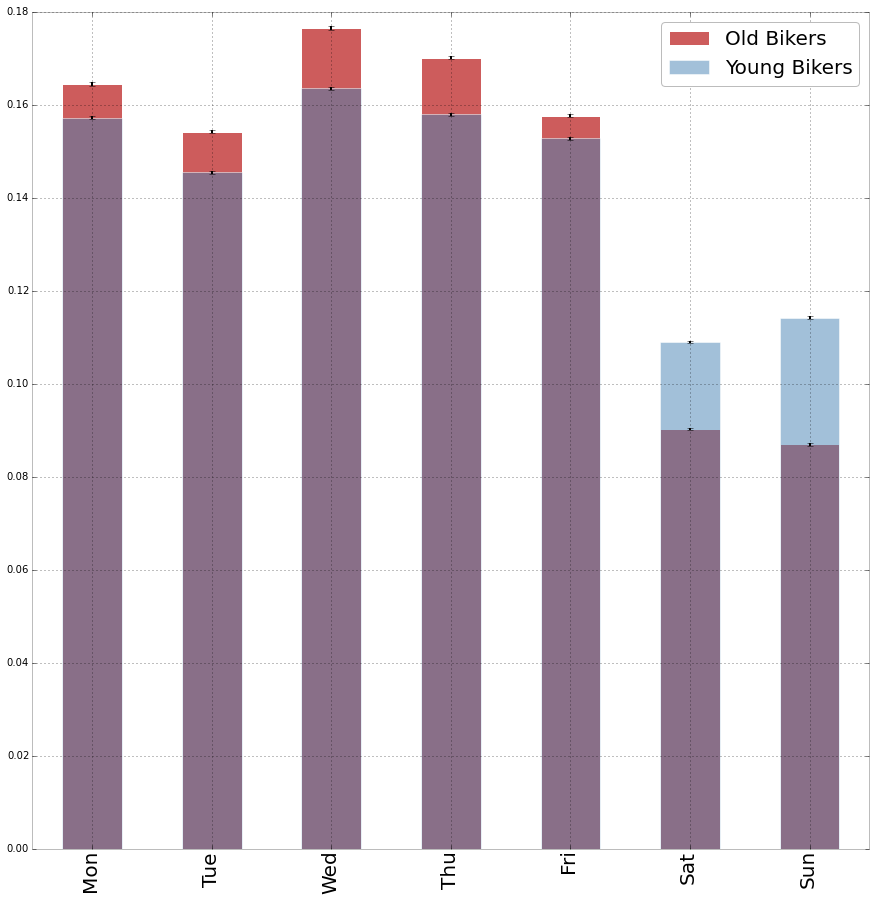

In [10]:
dfs_Su['date'] = pd.to_datetime(dfs_Su['starttime'])
fig=pl.figure(figsize(15,15))
dfs_Su['age'] = 2015-dfs_Su['birth year']

counts_o3= dfs_Su.date[dfs_Su.age>35].groupby([dfs_Su.date.dt.weekday]).count()
norm_o3= counts_o3.sum()
error_o3=np.sqrt(counts_o3)
((counts_o3)/norm_o3).plot(kind="bar",color='IndianRed',  yerr=[((error_o3)/norm_o3,(error_o3)/norm_o3)], label='Old Bikers')

counts_y3=dfs_Su.date[dfs_Su.age<=35].groupby([dfs_Su.date.dt.weekday]).count()
norm_y3=counts_y3.sum()
error_y3=np.sqrt(counts_y3)
ax3=((counts_y3)/norm_y3).plot(kind="bar", alpha=0.5, yerr=[((error_y3)/norm_y3,(error_y3)/norm_y3)], label='Young Bikers')
ax3.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)

pl.legend(['Old Bikers','Young Bikers'],fontsize=20)

0.822773611276 0.177226388724 0.000779818197012 0.000361923999221
0.776877581945 0.223122418055 0.000766819235113 0.00041094935919
0.822773611276 0.776877581945 0.800098422657 0.000489153436274 93.8274699267


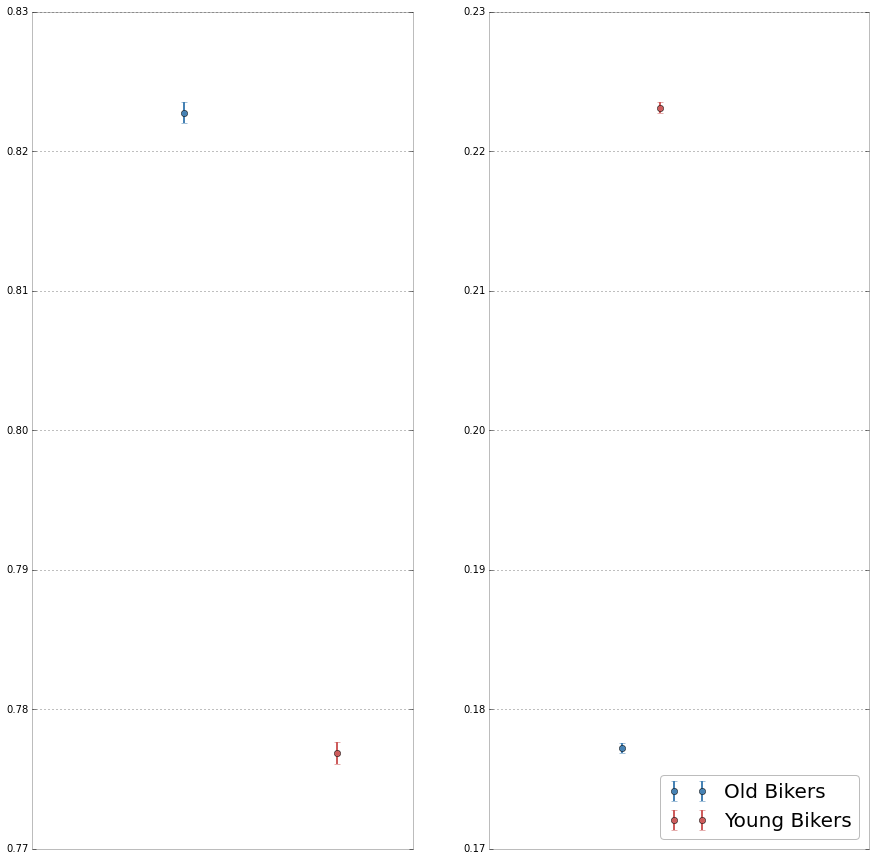

In [11]:
fig=pl.figure(figsize(15,15))
ax3_1=fig.add_subplot(121)
ax3_2=fig.add_subplot(122)
ax3_1.set_xticks([])
ax3_2.set_xticks([])
week_o3 = sum(counts_o3[:-2])*1.0/norm_o3
weekend_o3 = sum(counts_o3[-2:])*1.0/norm_o3
eweek_o3 = np.sqrt(sum(error_o3[:-2]**2))/norm_o3
eweekend_o3 = np.sqrt(sum(error_o3[-2:]**2))/norm_o3

week_y3 = sum(counts_y3[:-2])*1.0/norm_y3
weekend_y3 = sum(counts_y3[-2:])*1.0/norm_y3
eweek_y3 = np.sqrt(sum(error_y3[:-2]**2))/norm_y3
eweekend_y3 = np.sqrt(sum(error_y3[-2:]**2))/norm_y3

print week_o3,weekend_o3,eweek_o3,eweekend_o3
print week_y3,weekend_y3,eweek_y3,eweekend_y3

ax3_1.errorbar([0.2],[week_o3], yerr=[eweek_o3], fmt='o', label='Old Bikers')
ax3_1.errorbar([0.4],[week_y3], yerr=[eweek_y3], fmt='o', label='Young Bikers')
ax3_1.set_xlim(0,0.5)
ax3_2.errorbar([0.2],[weekend_o3], yerr=[eweekend_o3], fmt='o', label='Old Bikers')
ax3_2.errorbar([0.4],[weekend_y3], yerr=[eweekend_y3], fmt='o', label='Young Bikers')
ax3_2.set_xlim(0,0.5)
pl.xlim(-0.5,1.5)
pl.legend(fontsize=20, loc=4)

p3 = (week_o3*norm_o3 + week_y3*norm_y3)*1.0/ (norm_o3 + norm_y3)
SE3 = np.sqrt(p3 * ( 1. - p3 ) * ( (1./norm_o3) + (1./norm_y3) ) )
z3 = (week_o3 - week_y3 ) / SE3
print week_o3, week_y3, p3,SE3,z3

In [12]:
alpha=0.05
p_week2=1-1

def report_result(p,a):
    print 'is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

report_result(p_week1,alpha)

is the p value 0.00 smaller than the critical value 0.05? 
YES!
the Null hypothesis is rejected


In [ ]:
# in all three seasons, the null hypothesis is rejected
#thus we come to a conclusion that the older people which are 35 older are more likely to take citibike than younger
#people in weekdays